In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
cases_train = pd.read_csv('../data/cases_2021_train.csv')
cases_test = pd.read_csv('../data/cases_2021_test.csv')
location = pd.read_csv('../data/location_2021.csv')

In [3]:
cases_train.info()
cases_test.info()
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205846 entries, 0 to 205845
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              205846 non-null  int64  
 1   age                     23053 non-null   object 
 2   sex                     25484 non-null   object 
 3   province                205242 non-null  object 
 4   country                 205845 non-null  object 
 5   latitude                205846 non-null  float64
 6   longitude               205846 non-null  float64
 7   date_confirmation       205795 non-null  object 
 8   additional_information  12402 non-null   object 
 9   source                  187452 non-null  object 
 10  chronic_disease_binary  205846 non-null  bool   
 11  outcome_group           205846 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 17.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101387 entr

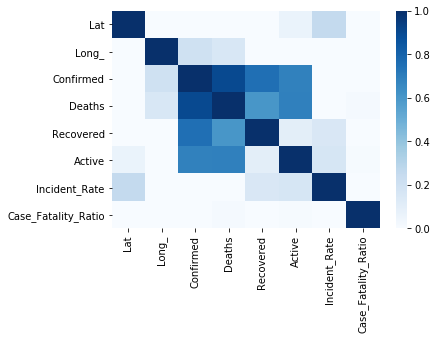

In [4]:
"""Basic check to see if there is some kind of numerical correlation in Locations"""
ax = sns.heatmap(location.corr(),vmin=0,vmax=1,cmap='Blues')
plt.show()

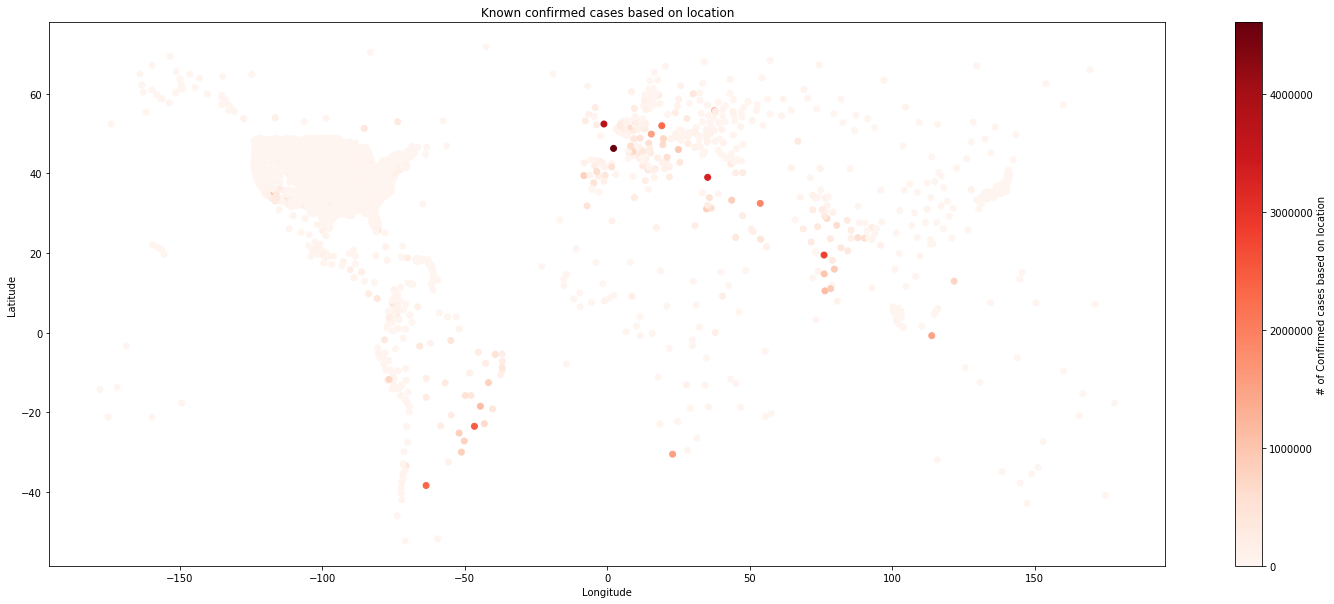

In [5]:
"""Heatmap of confirmed cases across the world"""
plt.figure(figsize=(25,10))
plt.scatter(x=location['Long_'],y=location['Lat'],c=location['Confirmed'],cmap='Reds')
cbar = plt.colorbar()
cbar.set_label('# of Confirmed cases based on location')
plt.xlabel("Longitude")
plt.title("Known confirmed cases based on location")
plt.ylabel("Latitude")
plt.savefig('../plots/task-1.3/figure1.png')

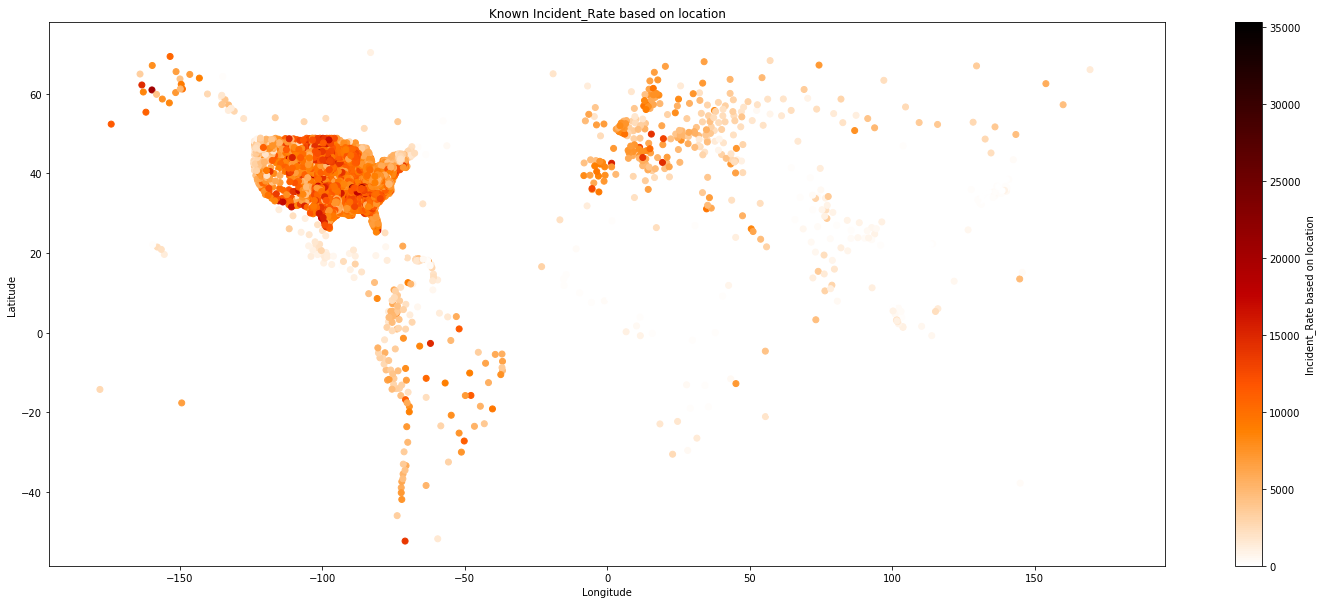

In [6]:
"""Heatmap of Incident_Rates across the world"""
plt.figure(figsize=(25,10))
plt.scatter(x=location['Long_'],y=location['Lat'],c=location['Incident_Rate'],cmap='gist_heat_r')
cbar = plt.colorbar()
cbar.set_label('Incident_Rate based on location')
plt.xlabel("Longitude")
plt.title("Known Incident_Rate based on location")
plt.ylabel("Latitude")
plt.savefig('../plots/task-1.3/figure2.png')

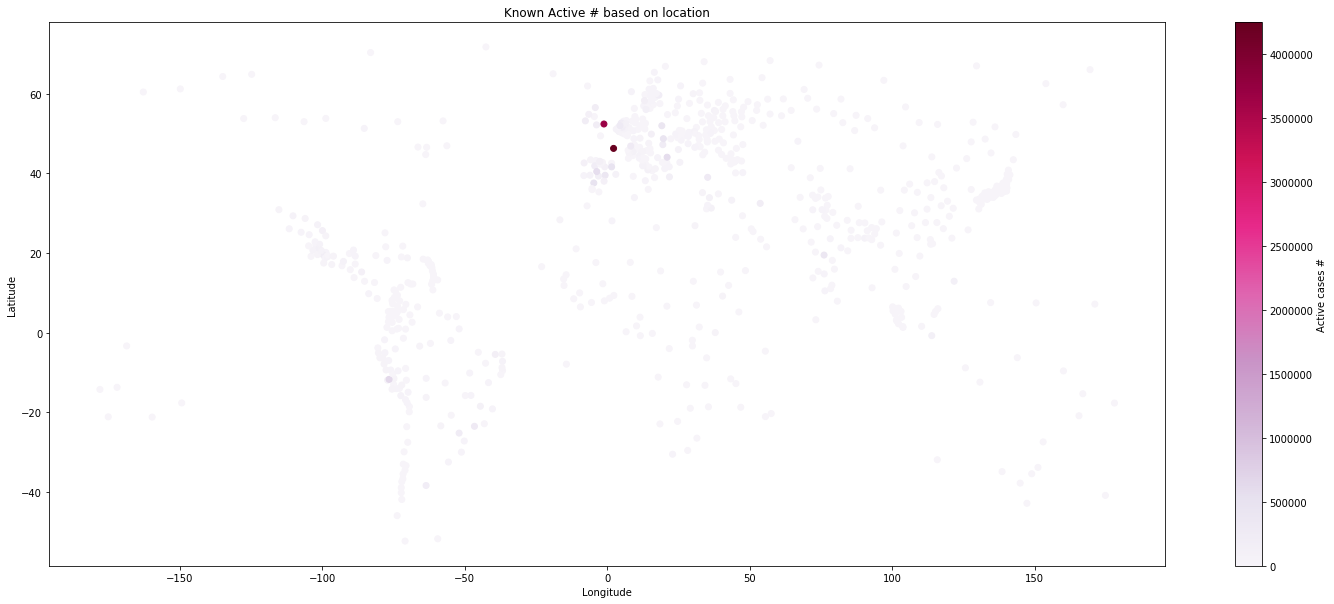

In [7]:
"""Heatmap of active cases across the world"""
plt.figure(figsize=(25,10))
plt.scatter(x=location['Long_'],y=location['Lat'],c=location['Active'],cmap='PuRd')
cbar = plt.colorbar()
cbar.set_label('Active cases #')
plt.xlabel("Longitude")
plt.title("Known Active # based on location")
plt.ylabel("Latitude")
plt.savefig('../plots/task-1.3/figure3.png')

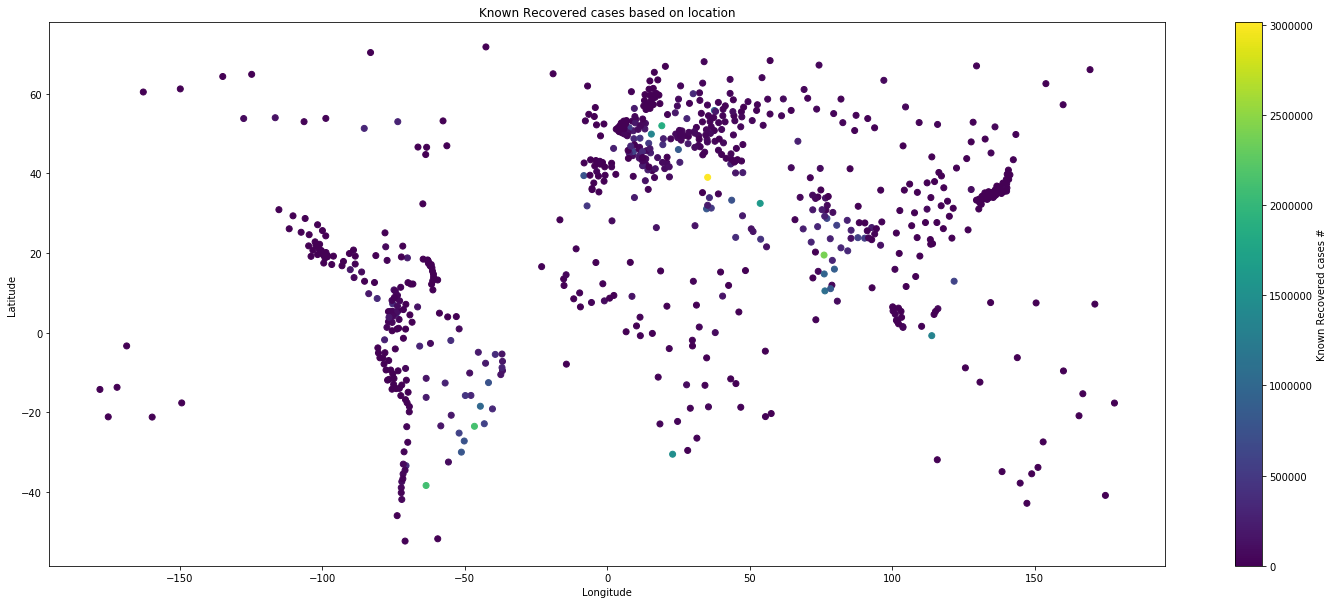

In [8]:
"""Heatmap of recovered cases across the world"""
plt.figure(figsize=(25,10))
plt.scatter(x=location['Long_'],y=location['Lat'],c=location['Recovered'],cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('Known Recovered cases #')
plt.xlabel("Longitude")
plt.title("Known Recovered cases based on location")
plt.ylabel("Latitude")
plt.savefig('../plots/task-1.3/figure4.png')

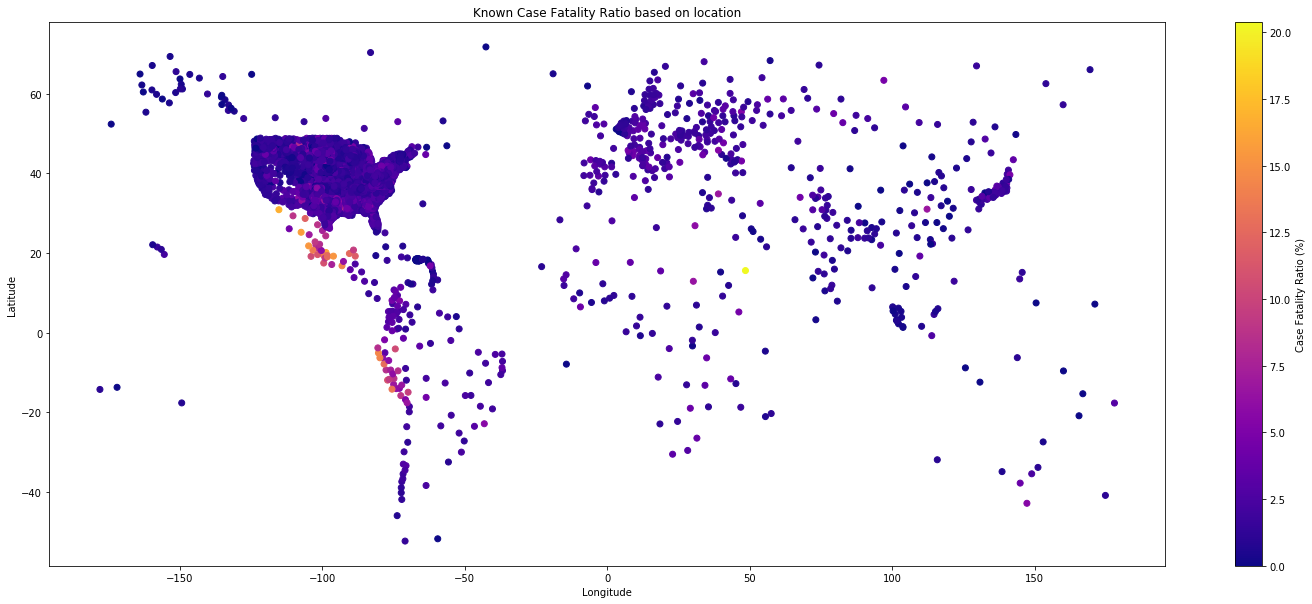

In [9]:
"""Heatmap of case fatality ratio percentage across the world"""
plt.figure(figsize=(25,10))
plt.scatter(x=location['Long_'],y=location['Lat'],c=location['Case_Fatality_Ratio'],cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Case Fatality Ratio (%)')
plt.xlabel("Longitude")
plt.title("Known Case Fatality Ratio based on location")
plt.ylabel("Latitude")
plt.savefig('../plots/task-1.3/figure5.png')

In [10]:
"""Creating a detailed map of mainland US since it is clustered. Therefore we will remove non mainland US territories"""
location_US = location.loc[location['Country_Region']=='US']
location_US = location_US[~location_US['Province_State'].isin(['Northern Mariana Islands','Guam','Hawaii','Alaska','Puerto Rico','Virgin Islands'])]

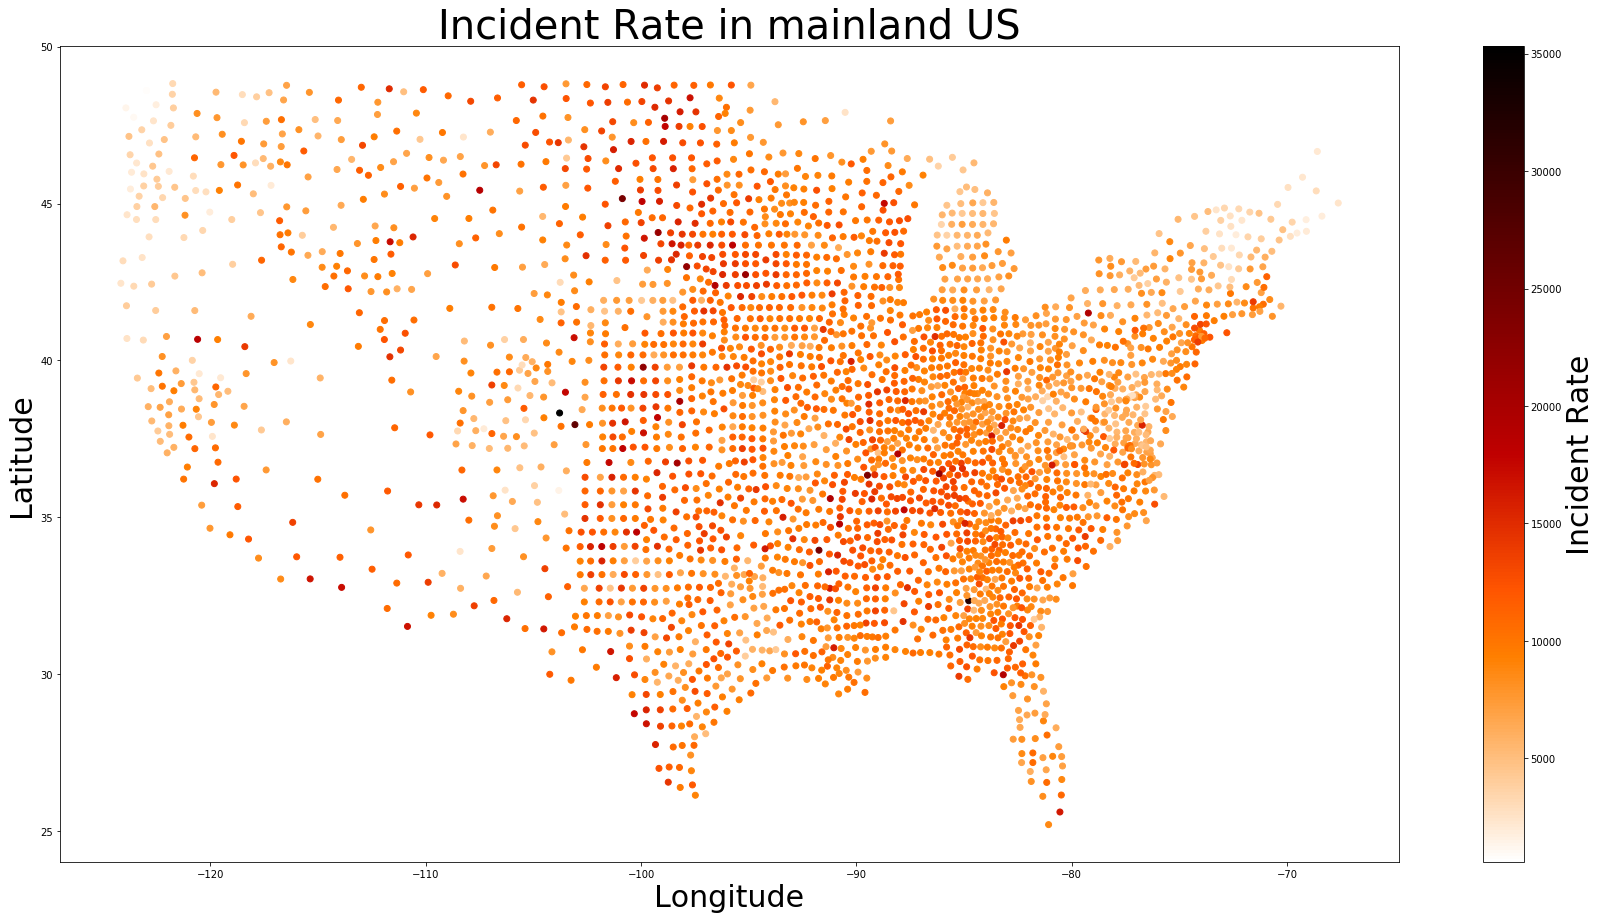

In [11]:
"""Detailed map of mainland US for Incident Rate"""
plt.figure(figsize=(30,15))
plt.scatter(x=location_US['Long_'],y=location_US['Lat'],c=location_US['Incident_Rate'],cmap='gist_heat_r')
cbar = plt.colorbar()
cbar.set_label('Incident Rate',fontsize = 30)
plt.xlabel("Longitude",fontsize = 30)
plt.title("Incident Rate in mainland US",fontsize = 40)
plt.ylabel("Latitude",fontsize = 30)
plt.savefig('../plots/task-1.3/figure6.png')

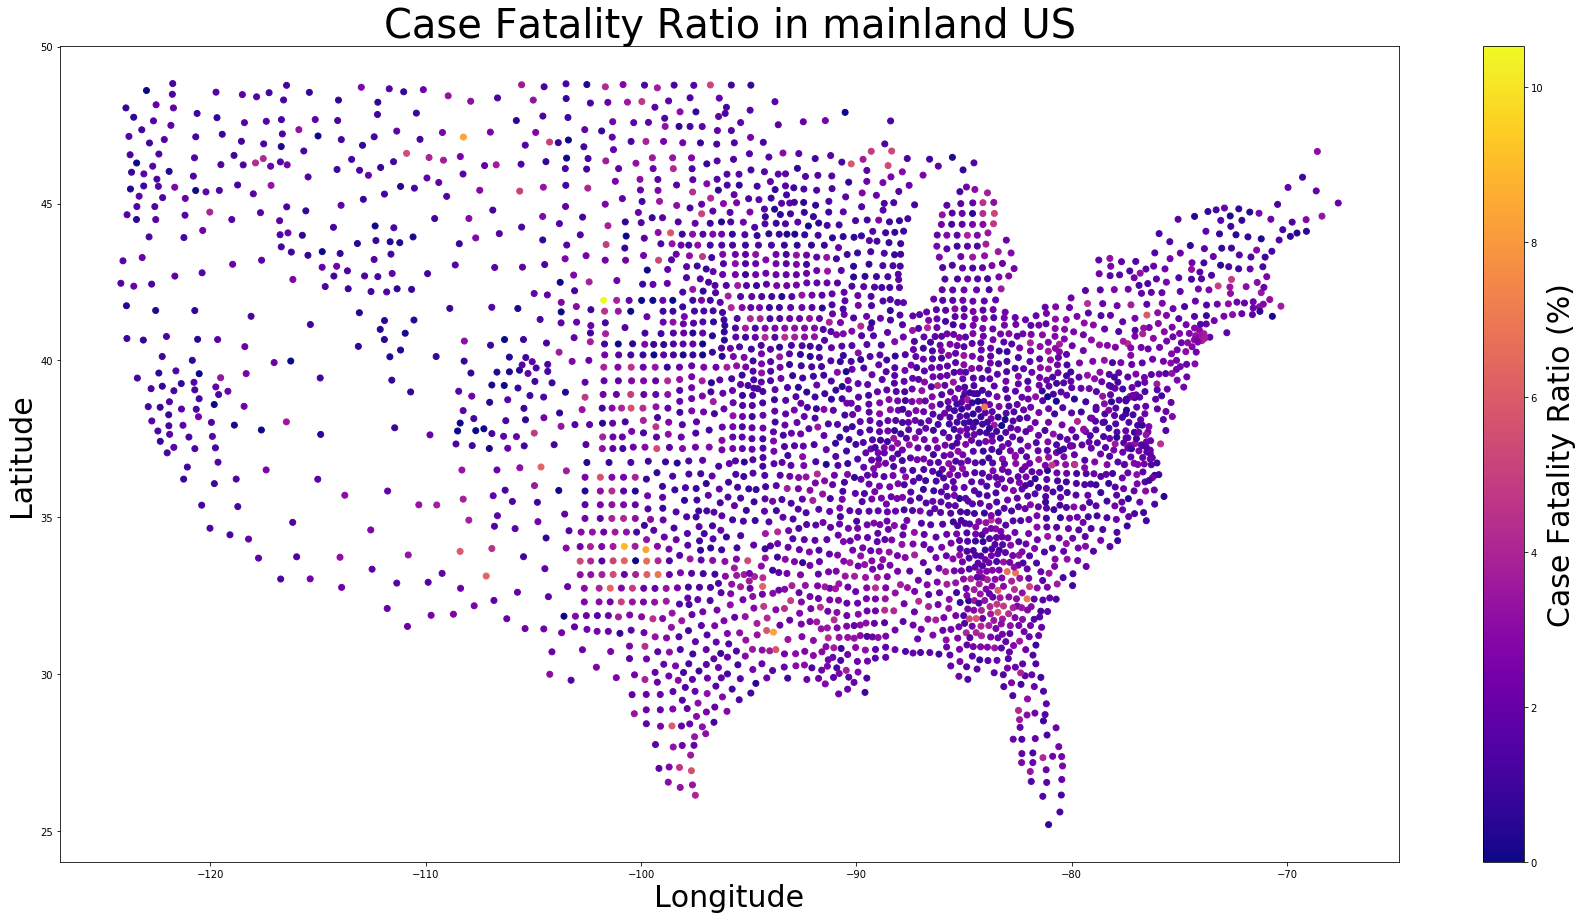

In [12]:
"""Detailed map of mainland US for Case Fatality Ratio"""
plt.figure(figsize=(30,15))
plt.scatter(x=location_US['Long_'],y=location_US['Lat'],c=location_US['Case_Fatality_Ratio'],cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Case Fatality Ratio (%)',fontsize = 30)
plt.xlabel("Longitude",fontsize = 30)
plt.title("Case Fatality Ratio in mainland US",fontsize = 40)
plt.ylabel("Latitude",fontsize = 30)
plt.savefig('../plots/task-1.3/figure7.png')

In [13]:
"""Checking to see if there is any correlation on outcome through Chronic disease binary"""
chronic_d = cases_train.loc[cases_train['chronic_disease_binary']==True]
not_chronic_d = cases_train.loc[cases_train['chronic_disease_binary']==False]

In [14]:
chronic_d=chronic_d.groupby('outcome_group').size()
not_chronic_d=not_chronic_d.groupby('outcome_group').size()

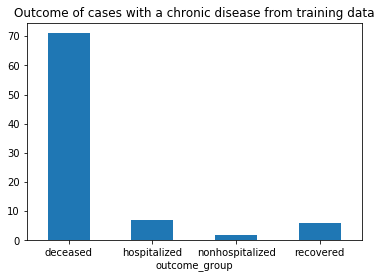

In [15]:
ax = chronic_d.plot.bar(title="Outcome of cases with a chronic disease from training data")
plt.xticks(rotation = 0)
plt.savefig('../plots/task-1.3/figure8.png')

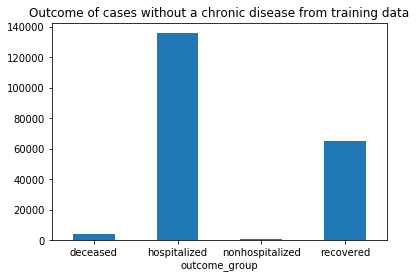

In [16]:
ax = not_chronic_d.plot.bar(title="Outcome of cases without a chronic disease from training data")
plt.xticks(rotation = 0)
plt.savefig('../plots/task-1.3/figure9.png')

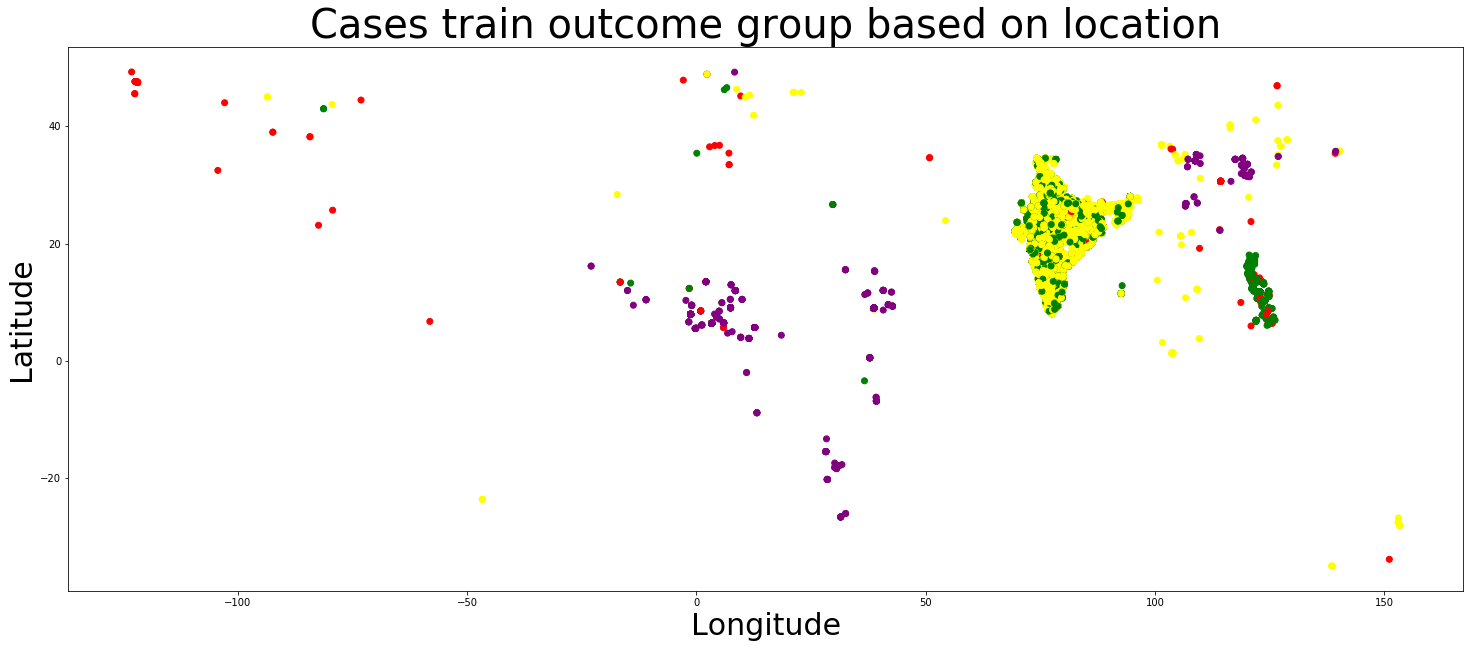

In [17]:
"""Categorize training cases by outcome group"""
plt.figure(figsize=(25,10))
colors={'recovered':'green','deceased':'red','hospitalized':'yellow','nonhospitalized':'purple'}
plt.scatter(x=cases_train['longitude'],y=cases_train['latitude'],c=cases_train['outcome_group'].map(colors))
plt.xlabel("Longitude",fontsize = 30)
plt.title("Cases train outcome group based on location",fontsize = 40)
plt.ylabel("Latitude",fontsize = 30)
plt.savefig('../plots/task-1.3/figure10.png')

In [18]:
"""Create a detailed version for India since it is cluttered"""
cases_train_india = cases_train.loc[cases_train['country']=='India']

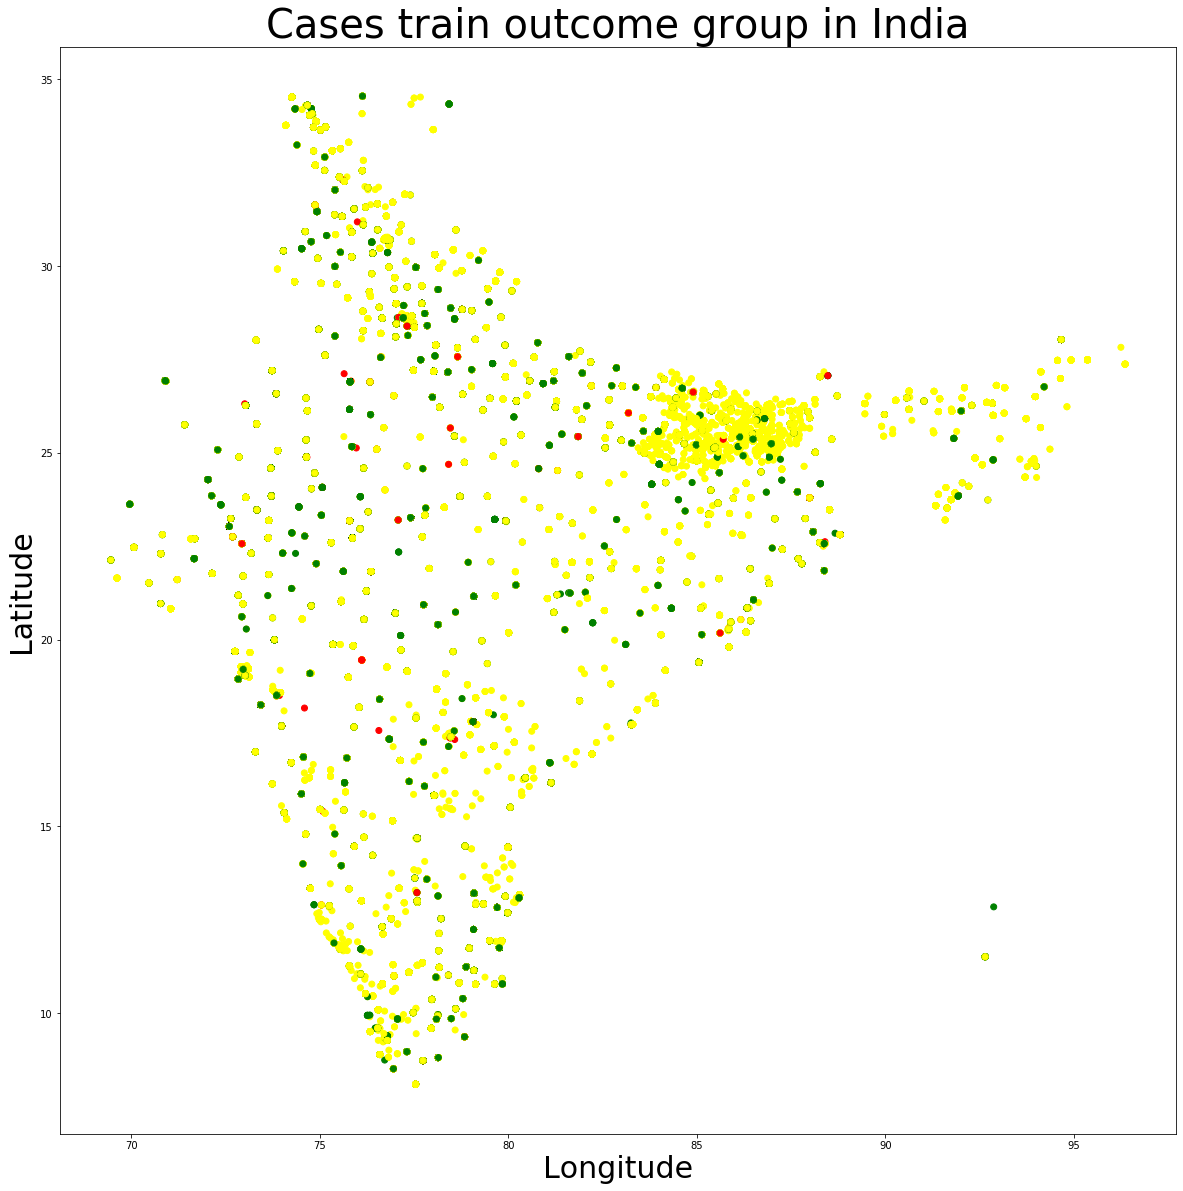

In [19]:
plt.figure(figsize=(20,20))
colors={'recovered':'green','deceased':'red','hospitalized':'yellow','nonhospitalized':'purple'}
plt.scatter(x=cases_train_india['longitude'],y=cases_train_india['latitude'],c=cases_train_india['outcome_group'].map(colors))
plt.xlabel("Longitude",fontsize = 30)
plt.title("Cases train outcome group in India",fontsize = 40)
plt.ylabel("Latitude",fontsize = 30)
plt.savefig('../plots/task-1.3/figure11.png')

In [20]:
"""Checking if there is a difference for confimed cases between train and test based on date"""
cases_train_date = cases_train[cases_train['date_confirmation'].str.len() == 10]
cases_train_date.loc[:,('date_confirmation')] = pd.to_datetime(cases_train_date['date_confirmation'])

C:\Users\kenta\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


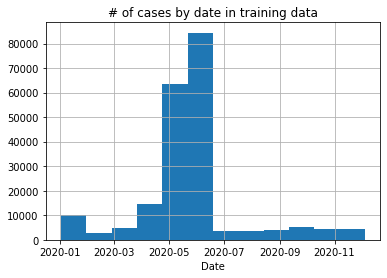

In [21]:
ax = cases_train_date['date_confirmation'].hist(bins = 12)
ax.set_xlabel('Date')
ax.set_title('# of cases by date in training data')
plt.savefig('../plots/task-1.3/figure12.png')

In [22]:
cases_test_date = cases_test[cases_test['date_confirmation'].str.len() == 10]
cases_test_date.loc[:,('date_confirmation')] = pd.to_datetime(cases_test_date['date_confirmation'])

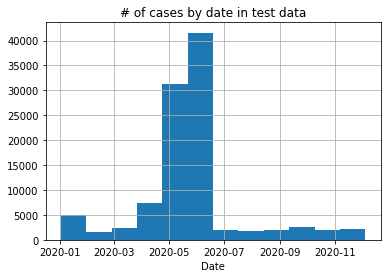

In [23]:
ax = cases_test_date['date_confirmation'].hist(bins = 12)
ax.set_xlabel('Date')
ax.set_title('# of cases by date in test data')
plt.savefig('../plots/task-1.3/figure13.png')

In [24]:
"""Checking if there are any differences in outcome depending on gender"""
cases_train_male = cases_train.loc[cases_train['sex']=="male"]
cases_train_female = cases_train.loc[cases_train['sex']=="female"]
cases_train_mf = pd.concat([cases_train_male,cases_train_female])
cases_train_male = cases_train_male.groupby("outcome_group").size()
cases_train_female = cases_train_female.groupby("outcome_group").size()
cases_train_mf = cases_train_mf.groupby("outcome_group").size()

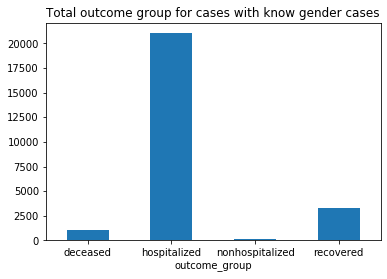

In [25]:
ax = cases_train_mf.plot.bar(title="Total outcome group for cases with know gender cases")
plt.xticks(rotation = 0)
plt.savefig('../plots/task-1.3/figure14.png')

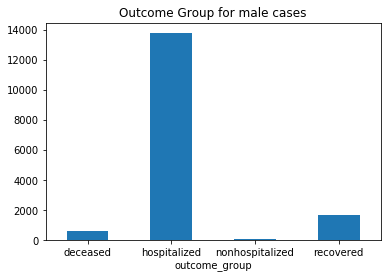

In [26]:
ax = cases_train_male.plot.bar(title="Outcome Group for male cases")
plt.xticks(rotation = 0)
plt.savefig('../plots/task-1.3/figure15.png')

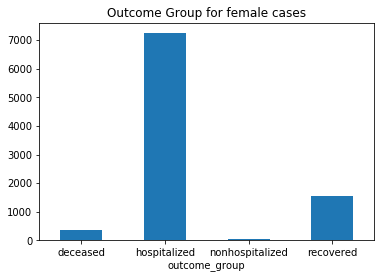

In [27]:
ax = cases_train_female.plot.bar(title="Outcome Group for female cases")
plt.xticks(rotation = 0)
plt.savefig('../plots/task-1.3/figure16.png')

In [29]:
"""Printing out NaN sum"""
print(cases_train.isna().sum())

Unnamed: 0                     0
age                       182793
sex                       180362
province                     604
country                        1
latitude                       0
longitude                      0
date_confirmation             51
additional_information    193444
source                     18394
chronic_disease_binary         0
outcome_group                  0
dtype: int64


In [30]:
print(cases_test.isna().sum())

age                        90013
sex                        88765
province                     296
country                        1
latitude                       0
longitude                      0
date_confirmation             23
additional_information     95206
source                      9160
chronic_disease_binary         0
outcome_group             101387
dtype: int64


In [31]:
print(location.isna().sum())

Province_State          174
Country_Region            0
Last_Update               0
Lat                      89
Long_                    89
Confirmed                 0
Deaths                    0
Recovered              3275
Active                 3275
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      48
dtype: int64
